In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

##### Load Airbnb listing data

In [3]:
q3_21 = pd.read_csv("../Data_Files/listings _202109.csv")
q4_21 = pd.read_csv("../Data_Files/listings_202112.csv")
q1_22 = pd.read_csv("../Data_Files/listings_202203.csv")
q2_22 = pd.read_csv("../Data_Files/listings _202206.csv")

In [49]:
# combine dataframes
airbnb_listings = pd.concat([q3_21, q4_21, q1_22, q2_22])

In [83]:
print("Total number of rows in airbnb listings:", len(airbnb_listings))

Total number of rows in airbnb listings: 150241


In [85]:
airbnb_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,340,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,408,2021-06-29,5.03,1,208,58,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.54,1,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,204,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,490,2021-08-14,3.64,1,243,17,NaN


##### Load Airbnb Calendar data

In [10]:
q2_22_cal = pd.read_csv("../Data_Files/calendar_nyc_q2_2022.csv.gz", compression="gzip", header=0, sep=",")
q1_22_cal = pd.read_csv("../Data_Files/calendar_nyc_q1_2022.csv.gz", compression="gzip", header=0, sep=",")
q4_21_cal = pd.read_csv("../Data_Files/calendar_nyc_q4_2021.csv.gz", compression="gzip", header=0, sep=",")
q3_21_cal = pd.read_csv("../Data_Files/calendar_nyc_q3_2021.csv.gz", compression="gzip", header=0, sep=",")

In [51]:
# combine dataframes
airbnb_cal = pd.concat([q3_21_cal, q4_21_cal, q1_22_cal, q2_22_cal])

In [86]:
print("Total number of rows in airbnb calendar listings:", len(airbnb_cal))

Total number of rows in airbnb calendar listings: 54784802


In [46]:
print("Start date is:", airbnb_cal.date.min())
print("End date is:", airbnb_cal.date.max())

Start date is: 2021-09-01 00:00:00
End date is: 2023-06-03 00:00:00


#### Clean price column and summarize mean

In [52]:
# remove na in price column
airbnb_cal = airbnb_cal[airbnb_cal.price.notna()]

# clean price column
new_price = [ p.replace("$", "").replace(",", "") for p in airbnb_cal.price ]

# apply clean prices
airbnb_cal.price = new_price

# round price to 2 decimals
airbnb_cal.price = round(airbnb_cal.price.astype("float"), 2)

# remove records where price = 0
airbnb_cal = airbnb_cal[airbnb_cal.price > 0]

# cast to date
airbnb_cal['date'] = pd.to_datetime(airbnb_cal['date'])

airbnb_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,57754,2021-09-02,f,285.0,$285.00,2.0,7.0
1,2595,2021-09-02,f,150.0,$150.00,30.0,1125.0
2,2595,2021-09-03,f,150.0,$150.00,30.0,1125.0
3,2595,2021-09-04,f,150.0,$150.00,30.0,1125.0
4,2595,2021-09-05,f,150.0,$150.00,30.0,1125.0


In [56]:
# show price statistics
airbnb_cal.price.describe().apply("{0:.4f}".format)

count    54784802.0000
mean          177.5426
std           336.5264
min             4.0000
25%            70.0000
50%           120.0000
75%           195.0000
max         48800.0000
Name: price, dtype: object

In [58]:
# summarize mean price
airbnb_price_day = airbnb_cal.groupby("date")["price"].mean().reset_index(name="mean_price")

# round mean price to 2 decimals
airbnb_price_day.mean_price = round(airbnb_price_day.mean_price, 2)

In [59]:
airbnb_price_day.head()

,date,mean_price
0,2021-09-01,138.77
1,2021-09-02,177.37
2,2021-09-03,178.99
3,2021-09-04,180.16
4,2021-09-05,175.62


In [60]:
airbnb_price_day.tail()

,date,mean_price
636,2023-05-30,199.74
637,2023-05-31,199.82
638,2023-06-01,202.00
639,2023-06-02,206.48
640,2023-06-03,194.80


#### Visualize mean price by day

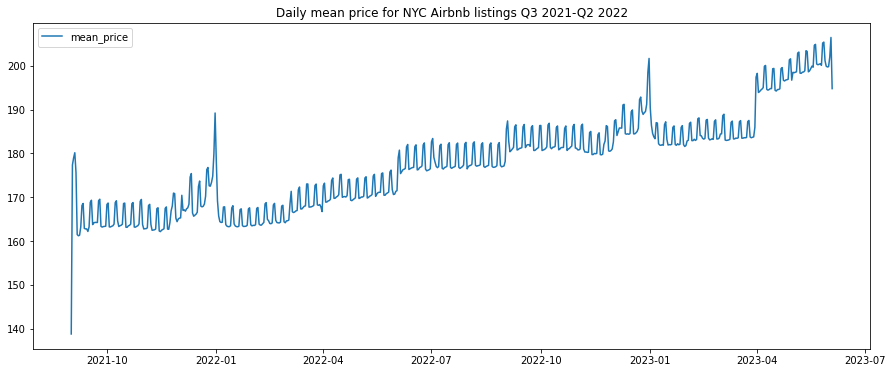

In [66]:
# set size of visualization
plt.figure(figsize=(15,6))

# plot data
plt.plot(airbnb_price_day.date, airbnb_price_day.mean_price, label="mean_price")

# display legend
plt.legend(loc="upper left")

# displaying the title
plt.title("Daily mean price for NYC Airbnb listings Q3 2021-Q2 2022")

plt.show()

#### Calculate rolling average

In [68]:
# function to create rolling average given a window size
def calc_rolling_stats(ser, wd_size=7) : return ser.rolling(wd_size, min_periods=1).mean().to_numpy()

In [72]:
# calculate rolling average on 7 day window
rolling_mean = calc_rolling_stats(airbnb_price_day, wd_size=7)

In [73]:
# see shape of rolling means
rolling_mean.shape

(641, 1)

#### Plot daily mean + rolling average prices

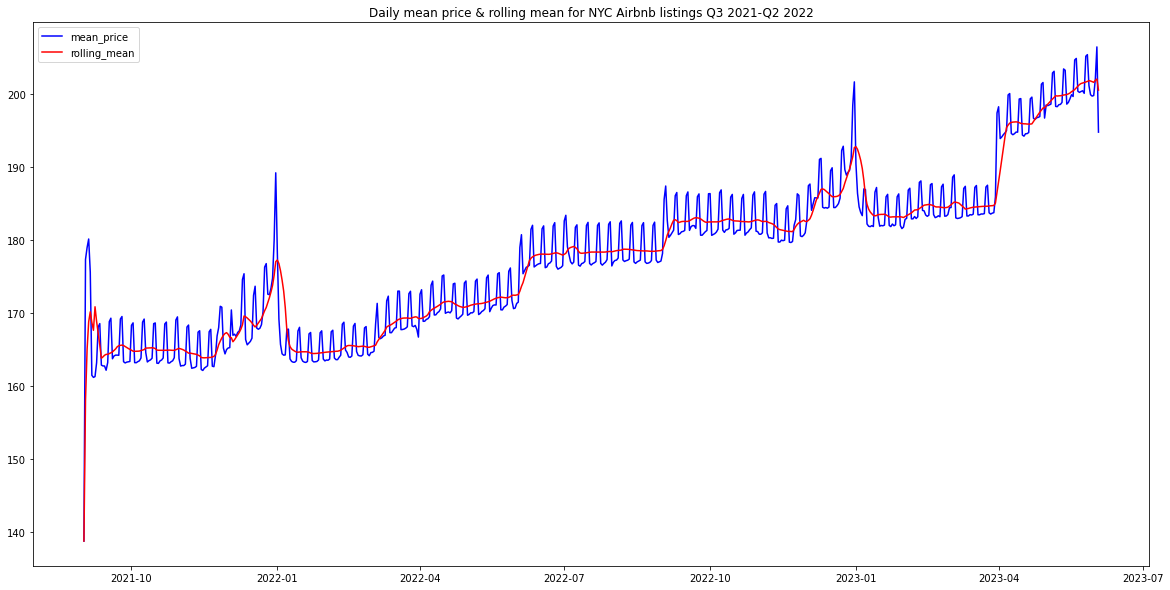

In [76]:
# set size of visualization
fig, ax = plt.subplots(figsize=(20, 10))

# plot daily mean price
ax.plot(airbnb_price_day.date, airbnb_price_day.mean_price, color='blue', label="mean_price")

# plot rolling mean
ax.plot(airbnb_price_day.date, pd.Series(rolling_mean.reshape(641,)), color='red', label="rolling_mean")

# display legend
plt.legend(loc="upper left")

# displaying the title
plt.title("Daily mean price & rolling mean for NYC Airbnb listings Q3 2021-Q2 2022")

plt.show()

In [ ]:
@